### Abstract
When we first look at the file we can see that it is the biggest one of all, most of the data will not be used, we will create samples. Lets set an a priory goal to see if there is a connection between the countries and some of the ingredients that don't have that much NAN values. We should be careful with the path we take, it could lead us to a dead end. This may require starting the whole thing again almost from the start.

In [10]:
%matplotlib inline

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Author
## Stefan Panev

### Introduction
For the first dataset the large open food facts file is used. Due to its large size this file will not be uploaded. The data can be seen in this link: https://www.kaggle.com/openfoodfacts/world-food-facts/home

## Table of Contents:
* [Introduction](#first-bullet)
* [Reading the Data and Preprocessing](#second-bullet)
* [Correlation Analysis](#third-bullet)
* [EDA - grouping and plotting](#fourth-bullet)
* [Hypothesis testing via t test](#fifth-bullet)
* [Conclusion](#sixth-bullet)
* [Further Development](#seventh-bullet)

### Reading the Data and Preprocessing
The file is stored in the variable food_data, the separator tab or '\t' has been used. At the beginning we have 356027 rows and 163 columns, the names of the columns can be viewed below.

In [12]:
food_data = pd.read_csv('data\en.openfoodfacts.org.products.txt',sep='\t')

C:\Users\Stefan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [13]:
food_data.shape

(356027, 163)

In [14]:
food_data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
food_data.columns.values

array(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en',
       'serving_size', 'no_nutriments', 'additives_n', 'additives',
       'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n',
       'ingredients_from_palm_oil', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
   

In [16]:
names = ['nutrition-score-fr_100g', 'calcium_100g', 'potassium_100g','vitamin-pp_100g','vitamin-b2_100g','vitamin-b1_100g','vitamin-c_100g','vitamin-a_100g',
'sodium_100g', 'salt_100g','iron_100g', 'calcium_100g', 'proteins_100g', 'fiber_100g', 'sugars_100g', 'carbohydrates_100g', 'cholesterol_100g','trans-fat_100g', 
'polyunsaturated-fat_100g', 'monounsaturated-fat_100g', 'saturated-fat_100g', 'fat_100g', 'energy_100g', 'image_small_url', 'pnns_groups_2', 'pnns_groups_1',
'nutrition_grade_fr', 'ingredients_that_may_be_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_from_palm_oil_n', 'additives', 'serving_size', 'traces', 
'allergens', 'ingredients_text', 'countries', 'stores', 'purchase_places', 'labels',
'manufacturing_places', 'origins_tags', 'categories', 'brands', 'packaging', 'quantity', 'generic_name', 'product_name', 'last_modified_datetime', 'created_datetime',
'creator', 'code', 'url']

In [17]:
food_data = food_data[names]

In [18]:
food_data.head()

,nutrition-score-fr_100g,calcium_100g,potassium_100g,vitamin-pp_100g,vitamin-b2_100g,vitamin-b1_100g,vitamin-c_100g,vitamin-a_100g,sodium_100g,salt_100g,...,brands,packaging,quantity,generic_name,product_name,last_modified_datetime,created_datetime,creator,code,url
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Ferme t'y R'nao,NaN,1kg,NaN,Farine de blé noir,2016-09-17T09:18:13Z,2016-09-17T09:17:46Z,openfoodfacts-contributors,3087,http://world-en.openfoodfacts.org/product/0000...
1,14.0,0.000,NaN,NaN,NaN,NaN,0.0214,0.0,0.000,0.00000,...,NaN,NaN,NaN,NaN,Banana Chips Sweetened (Whole),2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,4530,http://world-en.openfoodfacts.org/product/0000...
2,0.0,0.071,NaN,NaN,NaN,NaN,0.0000,0.0,0.250,0.63500,...,Torn & Glasser,NaN,NaN,NaN,Peanuts,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z,usda-ndb-import,4559,http://world-en.openfoodfacts.org/product/0000...
3,12.0,0.143,NaN,NaN,NaN,NaN,NaN,NaN,0.482,1.22428,...,Grizzlies,NaN,NaN,NaN,Organic Salted Nut Mix,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z,usda-ndb-import,16087,http://world-en.openfoodfacts.org/product/0000...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bob's Red Mill,NaN,NaN,NaN,Organic Polenta,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z,usda-ndb-import,16094,http://world-en.openfoodfacts.org/product/0000...


In [19]:
food_data.shape

(356027, 52)

The first reduction brings as to 52 columns, but a lot of the columns contain missing values.

In [20]:
gaps = food_data.isnull().sum()

In [21]:
gaps = gaps.sort_values()

In [22]:
gaps

last_modified_datetime                             0
creator                                            3
created_datetime                                  10
url                                               26
code                                              26
countries                                        275
product_name                                   17512
brands                                         29050
energy_100g                                    60660
proteins_100g                                  61866
salt_100g                                      66288
sodium_100g                                    66333
ingredients_text                               72134
ingredients_from_palm_oil_n                    72160
ingredients_that_may_be_from_palm_oil_n        72160
additives                                      72202
fat_100g                                       76530
carbohydrates_100g                             76807
sugars_100g                                   

We create a new variable named gaps, that sums the NAN values, after that the values are being sorted in an ascending order. Some of the foods don't contain the present ingredients, so this could be the reason for their absence.

In [23]:
gaps = gaps[gaps < 101172]

In [24]:
names2 = gaps.index

In [25]:
food_data = food_data[names2]

In [26]:
food_data.shape

(356027, 22)

We choose to remove the columns that have more then 101172 NAN values and place them in the new variable names2. Due to the fact that the file remains large with 22 columns and 356027 rows, lets make a sample containing only the first 10000 rows to speed the computational process. The data is exported to a food.csv file it is commented out on purpose.

In [27]:
food_data = food_data.head(10000)

In [28]:
#food_data.to_csv('food.csv', sep='\t')

In [29]:
food_data.head()

,last_modified_datetime,creator,created_datetime,url,code,countries,product_name,brands,energy_100g,proteins_100g,...,ingredients_text,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,additives,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,nutrition_grade_fr,nutrition-score-fr_100g
0,2016-09-17T09:18:13Z,openfoodfacts-contributors,2016-09-17T09:17:46Z,http://world-en.openfoodfacts.org/product/0000...,3087,en:FR,Farine de blé noir,Ferme t'y R'nao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-03-09T14:32:37Z,usda-ndb-import,2017-03-09T14:32:37Z,http://world-en.openfoodfacts.org/product/0000...,4530,US,Banana Chips Sweetened (Whole),NaN,2243.0,3.57,...,"Bananas, vegetable oil (coconut oil, corn oil ...",0.0,0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,28.57,64.29,14.29,28.57,d,14.0
2,2017-03-09T14:32:37Z,usda-ndb-import,2017-03-09T14:32:37Z,http://world-en.openfoodfacts.org/product/0000...,4559,US,Peanuts,Torn & Glasser,1941.0,17.86,...,"Peanuts, wheat flour, sugar, rice flour, tapio...",0.0,0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,17.86,60.71,17.86,0.00,b,0.0
3,2017-03-09T10:35:31Z,usda-ndb-import,2017-03-09T10:35:31Z,http://world-en.openfoodfacts.org/product/0000...,16087,US,Organic Salted Nut Mix,Grizzlies,2540.0,17.86,...,"Organic hazelnuts, organic cashews, organic wa...",0.0,0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,57.14,17.86,3.57,5.36,d,12.0
4,2017-03-09T10:34:13Z,usda-ndb-import,2017-03-09T10:34:13Z,http://world-en.openfoodfacts.org/product/0000...,16094,US,Organic Polenta,Bob's Red Mill,1552.0,8.57,...,Organic polenta,0.0,0.0,[ organic-polenta -> en:organic-polenta ] [...,1.43,77.14,NaN,NaN,NaN,NaN


### Correlation Analysis

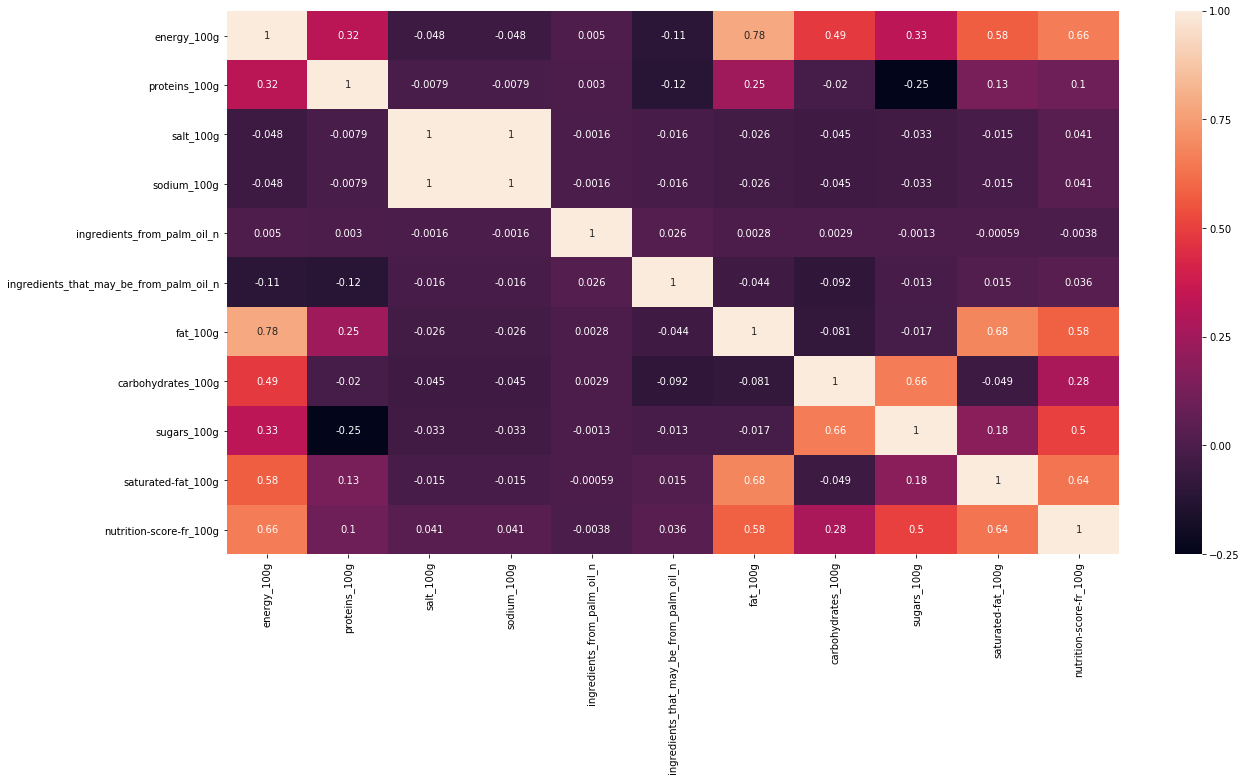

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(food_data.corr(), annot = True)

We have created a heatmap with the correlation matrix, some of the variables are interchangeable, which have a correlation coefficient of 1 like salt and sodium. One of it is derived by the other. Now we will use scatter plot to view the data points with high correlation coefficients.

Text(0,0.5,'nutrition-score-fr_100g')

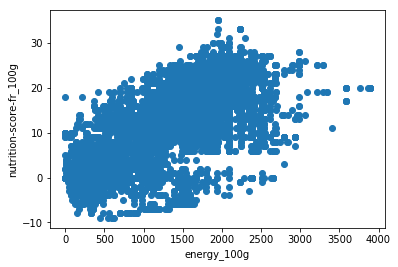

In [31]:
plt.scatter(food_data['energy_100g'], food_data['nutrition-score-fr_100g'])
plt.xlabel('energy_100g')
plt.ylabel('nutrition-score-fr_100g')

There is definitely a link here between the variables.

Text(0,0.5,'fat_100g')

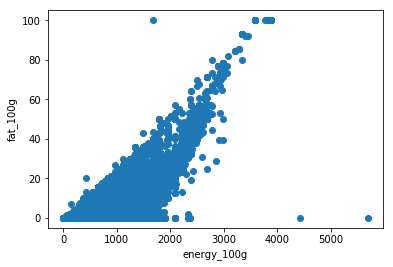

In [32]:
plt.scatter(food_data['energy_100g'], food_data['fat_100g'])
plt.xlabel('energy_100g')
plt.ylabel('fat_100g')

Here we have some outliers in the bottom right and the upper left, but still there is a link in the majority of the variables.

Text(0,0.5,'fat_100g')

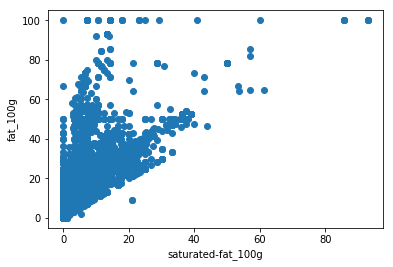

In [33]:
plt.scatter(food_data['saturated-fat_100g'], food_data['fat_100g'])
plt.xlabel('saturated-fat_100g')
plt.ylabel('fat_100g')

There is some connection in the beginning near the start of the coordinate system, but later there seems to be a dispersal of the points. This is a sing of Heteroscedasticity. For more information you can read here http://www.statsmakemecry.com/smmctheblog/confusing-stats-terms-explained-heteroscedasticity-heteroske.html

Text(0,0.5,'carbohydrates_100g')

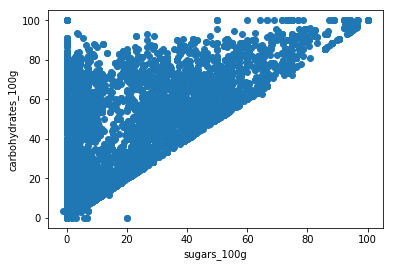

In [34]:
plt.scatter(food_data['sugars_100g'], food_data['carbohydrates_100g'])
plt.xlabel('sugars_100g')
plt.ylabel('carbohydrates_100g')

The last one is interesting with the exception of an outlier near 20 part of the x-axis all the data is from the left of the scatter plot, there seems also like the case above to be a declining link between the 2 when the values increase.

### EDA - grouping and plotting

Text(0.5,1,'Sugars per 100g histogram')

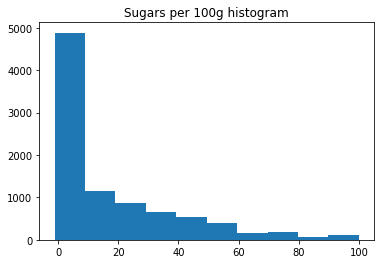

In [35]:
plt.hist(food_data['sugars_100g'].dropna())
plt.title('Sugars per 100g histogram')

The distribution is definitely not normal, it seems more like exponential distribution for more information check here: http://www.statisticshowto.com/exponential-distribution/ or log normal distribution see here: http://www.statisticshowto.com/lognormal-distribution/

In [42]:
food_data['sugars_100g'].skew()

1.5919986030245741

First plotting the sugars_100g data we see it is skewed to the right, the skewness coefficient confirms the observation.

Text(0.5,1,'Sugars per 100g histogram 20 bins')

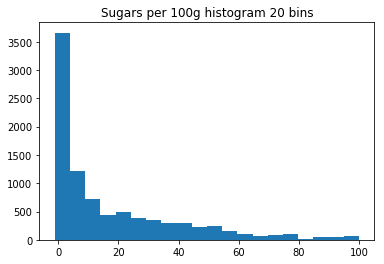

In [36]:
plt.hist(food_data['sugars_100g'].dropna(), bins = 20)
plt.title('Sugars per 100g histogram 20 bins')

Text(0.5,1,'carbohydrates_100g histogram 20 bins')

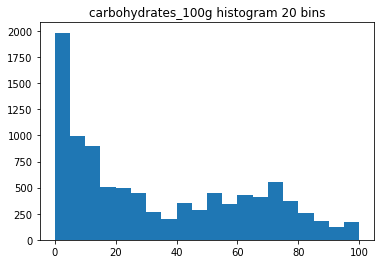

In [37]:
plt.hist(food_data['carbohydrates_100g'].dropna(), bins = 20)
plt.title('carbohydrates_100g histogram 20 bins')

In [43]:
food_data['carbohydrates_100g'].skew()

0.49806600679389967

The carbohydrates per 100g are less skewed compared to the sugars per 100g.

Text(0.5,1,'saturated-fat_100g histogram 20 bins')

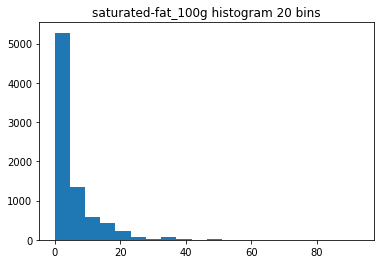

In [38]:
plt.hist(food_data['saturated-fat_100g'].dropna(), bins = 20)
plt.title('saturated-fat_100g histogram 20 bins')

In [44]:
food_data['saturated-fat_100g'].skew()

3.2270638695002658

The saturated fat per 100g is very highly skewed.

Text(0.5,1,'energy_100g histogram 20 bins')

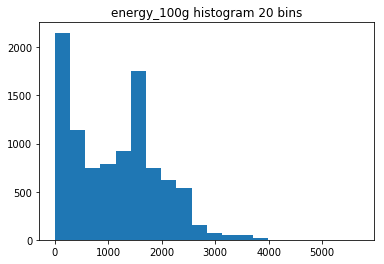

In [39]:
plt.hist(food_data['energy_100g'].dropna(), bins = 20)
plt.title('energy_100g histogram 20 bins')

In [45]:
food_data['energy_100g'].skew()

0.42197135739831415

We have similar situation with the carbohydrates.

In [105]:
counties_food = food_data.groupby(food_data['countries'], axis=0).mean()

In [106]:
counties_food.head()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g
countries,,,,,,,,,,,
Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Australie,Belgique,Suisse",419.000000,1.50,6.0000,2.362205,NaN,NaN,0.40,22.60,20.8000,0.10000,12.0
"Belgique,France",46.000000,0.60,7.4000,2.913386,0.0,0.0,0.00,1.80,0.0000,0.00000,9.0
"Belgique,France,Pays-Bas,Royaume-Uni",1309.500000,9.95,0.8050,0.316929,0.0,0.0,15.25,33.05,16.2500,8.45000,11.5
Canada,1034.833333,13.23,1.0805,0.425500,0.0,0.2,9.20,32.26,10.9248,3.04825,4.5


In [107]:
counties_food.index

Index(['Australia', 'Australie,Belgique,Suisse', 'Belgique,France',
       'Belgique,France,Pays-Bas,Royaume-Uni', 'Canada', 'Deutschland',
       'España', 'France', 'France, US', 'France,Allemagne',
       'France,Belgique,Pays-Bas,Royaume-Uni', 'France,Royaume-Uni',
       'France,Suisse,États-Unis,Canada', 'France,UK', 'France,United Kingdom',
       'France,United States', 'France,États-Unis', 'Germany', 'Ireland',
       'Nederland', 'Royaume-Uni,France', 'Suisse', 'Switzerland', 'UK,France',
       'US', 'United Kingdom', 'United Kingdom, US', 'United States', 'Usa',
       'en:AU', 'en:AU, en:france', 'en:BD', 'en:BR', 'en:CA', 'en:CA, US',
       'en:CH', 'en:DE', 'en:DO', 'en:ES', 'en:FR', 'en:FR, US',
       'en:FR,France', 'en:GB', 'en:GP', 'en:IT', 'en:PT', 'en:RE, en:france',
       'en:RO', 'en:SI', 'en:TW', 'en:US', 'en:US,United Kingdom',
       'États-Unis'],
      dtype='object', name='countries')

We tried to group by country and the mean value of the ingredients of the food, there are still a lot of missing values, but our biggest problem is that many of the names are the same, this can be seen with the index function. Some of the counties have more the one country. Some of the names are of different languages. Lets assume that the leading country is the first one (this may not be true at all, but we need to start somewhere). We will use the reset index country.

In [108]:
countries_food = counties_food.reset_index()

In [109]:
countries_food

,countries,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g
0,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Australie,Belgique,Suisse",419.000000,1.500000,6.000000,2.362205,NaN,NaN,0.400000,22.600000,20.800000,0.100000,12.000000
2,"Belgique,France",46.000000,0.600000,7.400000,2.913386,0.000000,0.000000,0.000000,1.800000,0.000000,0.000000,9.000000
3,"Belgique,France,Pays-Bas,Royaume-Uni",1309.500000,9.950000,0.805000,0.316929,0.000000,0.000000,15.250000,33.050000,16.250000,8.450000,11.500000
4,Canada,1034.833333,13.230000,1.080500,0.425500,0.000000,0.200000,9.200000,32.260000,10.924800,3.048250,4.500000
5,Deutschland,1650.100000,75.785000,0.931185,0.366608,0.000000,0.000000,5.210000,9.240000,17.375000,21.100000,26.000000
6,España,320.000000,3.600000,NaN,NaN,0.000000,0.000000,3.500000,7.500000,NaN,NaN,NaN
7,France,1135.487500,6.803797,0.776477,0.305699,0.013699,0.109589,12.865926,32.283433,16.273418,4.646837,10.303797
8,"France, US",641.000000,6.837500,9.560000,3.763780,NaN,NaN,2.917500,56.145000,24.233333,0.600000,11.666667
9,"France,Allemagne",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
countries_food.shape

(53, 12)

After analysing the results if we continue to remove the rows that hove only NaN values we will be left with too few, and if we continue to merge the rows even fewer, so this is a dead end for the grouping process we should try another way. It is said that.

<img src="data_image.png" style="max-height: 230px" />

In [124]:
food_data.columns

Index(['last_modified_datetime', 'creator', 'created_datetime', 'url', 'code',
       'countries', 'product_name', 'brands', 'energy_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'ingredients_text',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'additives', 'fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'saturated-fat_100g',
       'nutrition_grade_fr', 'nutrition-score-fr_100g'],
      dtype='object')

In [143]:
food_data['creator'].unique()

array(['openfoodfacts-contributors', 'usda-ndb-import', 'chris13',
       'date-limite-app', 'canieatthis-app', 'tacinte', 'teolemon', 'b7',
       'bcatelin', 'sigoise', 'tacite', 'kiliweb', 'sebleouf',
       'agamitsudo', 'twoflower', 'andre', 'syefulislam', 'javichu',
       'jeanbono', 'allfitnessfactory-de', 'beniben', 'kyzh', 'malikele',
       'gildubs', 'lbhlbh', 'wengong27514', 'brent', 'ysculo', 'chandon',
       'stephane', 'jm0804', 'woshilapin', 'max4food', 'foodorigins',
       'aleene', 'rjhunter', 'bdwyer', 'lilimarti', 'kp757',
       'trevorpetersen', 'recipekeepapp', 'aeon', 'php93', 'toni',
       'jiehong', 'pitajay', 'arig', 'bitnapper', 'openfood-ch-import',
       'jcnascimento', 'manuc66', 'xmunoz', 'roblaw', 'amaurea',
       'veganeamos'], dtype=object)

In [144]:
food_creator = food_data.groupby(food_data['creator'], axis=0).mean()

In [146]:
food_creator.head()

,energy_100g,proteins_100g,salt_100g,sodium_100g,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,fat_100g,carbohydrates_100g,sugars_100g,saturated-fat_100g,nutrition-score-fr_100g
creator,,,,,,,,,,,
aeon,1197.000,28.57000,1.54178,0.607000,0.0,0.0,17.860,3.5700,0.0,10.71,19.0
agamitsudo,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
aleene,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
allfitnessfactory-de,1588.875,83.45625,1.21158,0.477000,0.0,0.0,2.225,4.5125,6.0,NaN,NaN
amaurea,1928.000,5.10000,0.81000,0.318898,0.0,0.0,17.700,68.5000,44.4,10.10,24.0


In [147]:
food_creator.shape

(55, 11)

After careful thinking a new grouping has been chosen this time by the creator column. It will be devided by 2 populations some of them seem legitimate (like the data is from an organization or an app), other seem just like the names of common users, we will brand them as nicknames. I agree that this is not very scientific but it will be used for testing hypothesis based on a smaller then 30 samples, we will use the t test, so view the code more for demonstration purposes then from extraction useful information. There is a lot of subjective bias into the process, but don't make such a fuss from it there all all kind of idiotic scientific articles published even published by journal like this one : https://www.sciencealert.com/predatory-journal-fell-for-hoax-paper-about-uk-politician-s-bum-wiping

In [154]:
legitemate = food_creator.loc[['openfoodfacts-contributors', 'usda-ndb-import','date-limite-app', 'canieatthis-app',
                              'allfitnessfactory-de','syefulislam', 'recipekeepapp', 'openfood-ch-import',
                              'foodorigins']]

In [155]:
nicknames = food_creator.loc[['chris13', 'tacinte', 'teolemon', 'b7', 'bcatelin', 'sigoise', 'tacite', 'kiliweb',
                              'sebleouf','agamitsudo', 'twoflower', 'andre','javichu', 'jeanbono',
                              'beniben', 'kyzh', 'malikele',
                               'gildubs', 'lbhlbh', 'wengong27514', 'brent', 'ysculo', 'chandon',
                               'stephane', 'jm0804', 'woshilapin', 'max4food','aleene', 'rjhunter', 'bdwyer',
                              'lilimarti', 'kp757','trevorpetersen','aeon', 'php93', 'toni',
                               'jiehong', 'pitajay', 'arig', 'bitnapper','jcnascimento', 'manuc66', 'xmunoz', 
                              'roblaw', 'amaurea', 'veganeamos']]

In [156]:
legitemate.shape

(9, 11)

In [157]:
nicknames.shape

(46, 11)

### Hypothesis Testing
The first sample contains just 9 rows, while the second 46. Lets take the salt per 100g to test a hypothesis. We have dropped the NAN values so that they don't get in the way.

C:\Users\Stefan\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


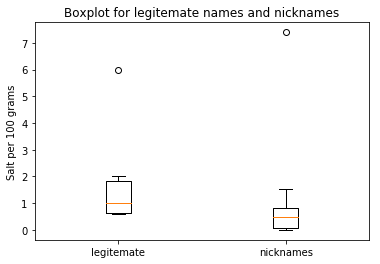

In [162]:
plt.boxplot([legitemate['salt_100g'].dropna(), nicknames['salt_100g'].dropna()], labels = ["legitemate", "nicknames"])
plt.ylabel("Salt per 100 grams")
plt.title('Boxplot for legitemate names and nicknames')
plt.show()

It seems that the nicknames are more symmetrically distributed then the legitemate. Both have 2 large outliers, considering we don't have that many observations we decide that the outliers will stay, now lets move to the t test, for more information about the t test read here: https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f.
<br>
We formulate the zeroth hypothesis as 
<br>
H0: that there is no statistically significant difference between the mean of the the 2 populations and 
<br>
H1: that there is a statistically significant difference between the mean of the the 2 categories.
<br>
We take a 0.05 significance value, if the p-value is larger then 0.05 we cannot reject the null hypothesis.


In [165]:
t, p = stats.ttest_ind(legitemate['salt_100g'].dropna(), nicknames['salt_100g'].dropna() , equal_var=False)

In [166]:
t, p

(1.2665620087526213, 0.25247116987644719)

At the end we will conclude that the H0 hypothesis is the correct one. This is not 100% true we say that there exist a 5% chance that we are wrong (known as type alpha error also knows as type 1 error), there is also the issue for type beta error (also known as type 2 error). For more information you can check here: https://www.students4bestevidence.net/type-i-and-type-ii-errors/

### Conclusion
To conclude this dataset is very large and unstructured, it requires a lot of formatting to get something more useful out of it, taking some paths can lead us to nowhere, sometimes we have to start from the beginning. Here it is probably an error we choose to remove so many column for having more then the stated threshold of NAN values. They could have been used for grouping. Finally a t test was used due to the small sample sizes.

### Further development
This dataset need a lot more attention in the future, considering its size several possible paths could be taken. The process is likely going to resemble trial and error, this should be taken under consideration when stating depending on the goal that might shift and the required resources and time.